# Analyse

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("results/res_29-11-24_15_49_37.csv", index_col=0)
data['Initial Sample'] = data['Initial Sample'].astype(str)

In [3]:
data.head()

,Runs,Initial Sample,Query Sample,Pair,Error on materialized,Error on lattice,Prediction
0,0,0.1,0.1,"('AA', 'B6')",0.444444,0.181818,1.000000
1,0,0.1,0.1,"('AA', 'MQ')",0.400000,0.285714,1.000000
2,0,0.1,1.0,"('VX', 'AA')",0.000000,0.071429,0.428571
3,0,0.1,1.0,"('VX', 'F9')",0.000000,0.433333,0.400000
4,0,0.1,1.0,"('VX', 'WN')",0.000000,0.175000,0.625000


In [4]:
pivot = pd.pivot_table(data, values="Error on lattice", index='Initial Sample', columns=['Query Sample'], aggfunc="mean")
pivot

Query Sample,0.1,0.6,1.0
Initial Sample,,,
0.1,0.233766,NaN,0.226587
0.6,0.679711,0.118687,0.075758
1.0,0.513391,0.346724,0.140970


<Axes: xlabel='Query Sample', ylabel='Initial Sample'>

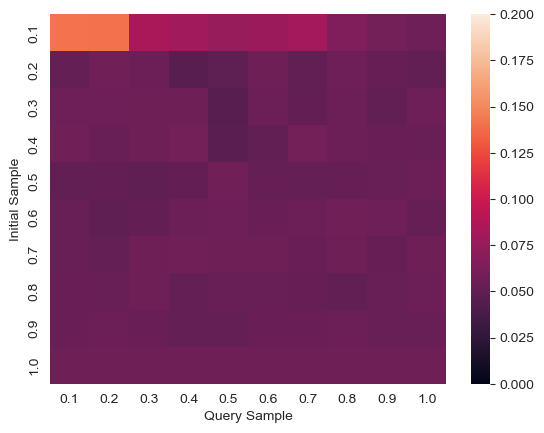

In [37]:
sns.heatmap(pivot, vmin=0, vmax=0.2)

<Axes: xlabel='Query Sample', ylabel='Error on materialized'>

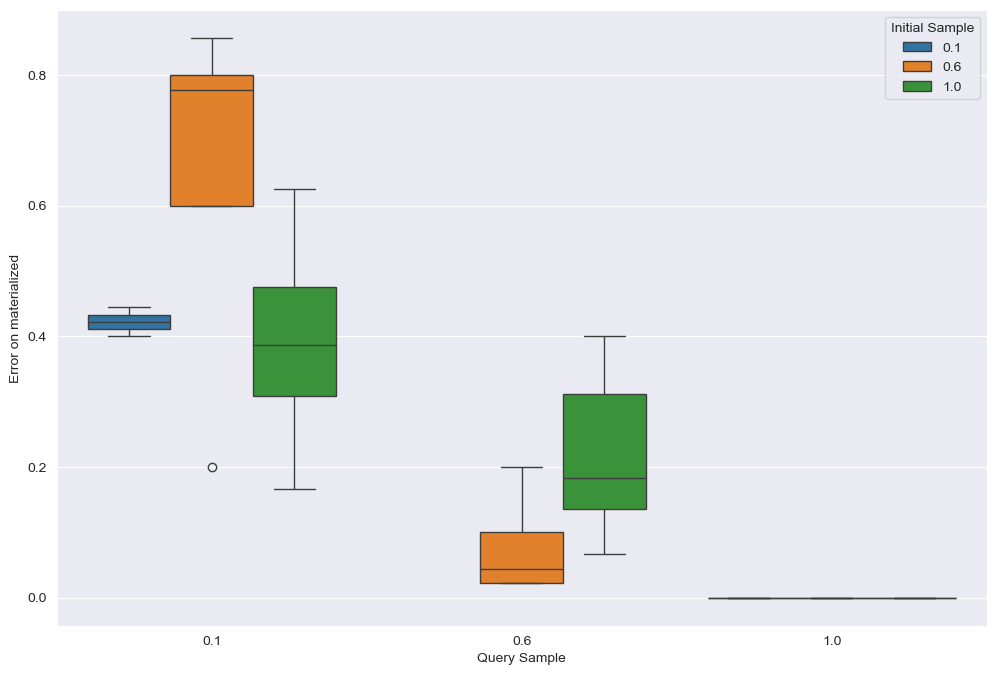

In [6]:
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=data, x="Query Sample", y="Error on materialized", hue="Initial Sample",)